In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/covid19-corona-virus-india-dataset/complete.csv
/kaggle/input/covid19-corona-virus-india-dataset/web_scraping.ipynb
/kaggle/input/covid19-corona-virus-india-dataset/patients_data.csv
/kaggle/input/covid19-corona-virus-india-dataset/api.ipynb
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [3]:
%matplotlib inline 

In [4]:
world_covid = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')
world_covid = world_covid.rename(columns = {
    'ObservationDate': 'Date',
    'Province/State': 'State',
    'Country/Region': 'Country'
})
world_covid.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
covid = pd.read_csv('/kaggle/input/covid19-corona-virus-india-dataset/complete.csv')
covid['Date'] = covid['Date'].astype('str')

In [6]:
covid.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [7]:
labs_covid = pd.read_csv('/kaggle/input/covid19-in-india/ICMRTestingLabs.csv')
labs_covid.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [8]:
age_covid = pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv')
age_covid.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


Text(0.5, 1.0, 'Worlds cases COVID-19')

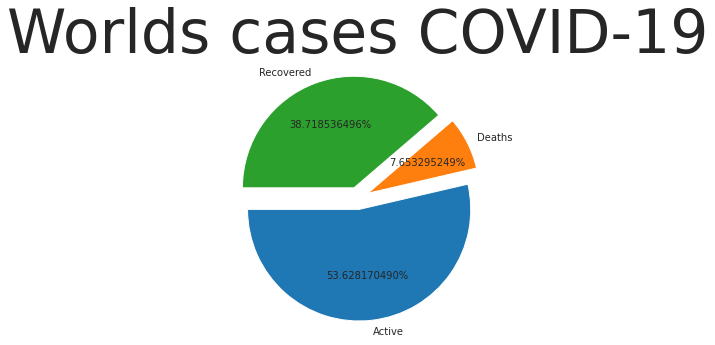

In [68]:
x = world_covid.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].max()
x['Active'] = x['Confirmed'] - (x['Deaths']+x['Recovered'])
active = x['Active'].sum()
death = x['Deaths'].sum()
rec = x['Recovered'].sum()
z = {
    'Active': active,
    'Deaths': death,
    'Recovered': rec
}
ser = pd.Series(z)
ser.name = ''
ser.plot(kind = 'pie', autopct = '%3.9f%%', explode = (0.1,0.1,0.1), figsize = (5,6), startangle = 180)
plt.title('Worlds cases COVID-19', fontsize = 60)

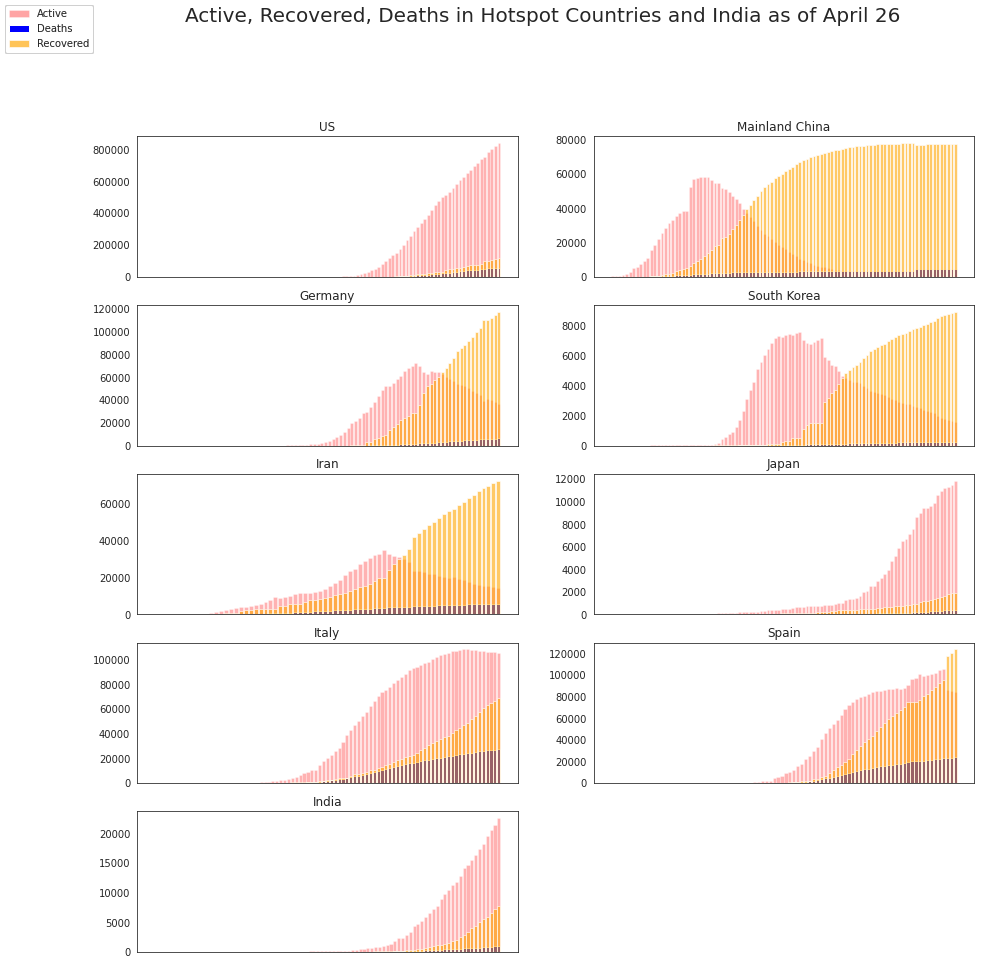

In [20]:
x = world_covid.groupby(['Country', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()
x['Active'] = x['Confirmed'] - (x['Deaths'] + x['Recovered'])
x = x.sort_values('Confirmed',ascending = False).T
countrys = ['US', 'Mainland China', 'Germany', 'South Korea', 'Iran', 'Japan', 'Italy', 'Spain','India']
fig = plt.figure(figsize = (15, 15))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of April 26',fontsize = 20,y=1.0)
for i in range(9):
    ax = fig.add_subplot(5,2,i+1)
    country = countrys[i]
    z = x[country].T.sort_values('Confirmed')
    ax.bar(z.index,z['Active'], color = 'red', alpha = 0.3, label = 'Active')
    ax.bar(z.index,z['Deaths'], color = 'b', label = 'Deaths')
    ax.bar(z.index,z['Recovered'], color = 'orange', alpha = 0.6, label = 'Recovered')
    ax.set_xticks([])
    plt.title(country)
    handle, label = ax.get_legend_handles_labels()
    fig.legend(handle, label, loc = 'upper left')

Text(0.5, 1.0, 'Total Latest Confirmed cases in Hotspot Countries and India')

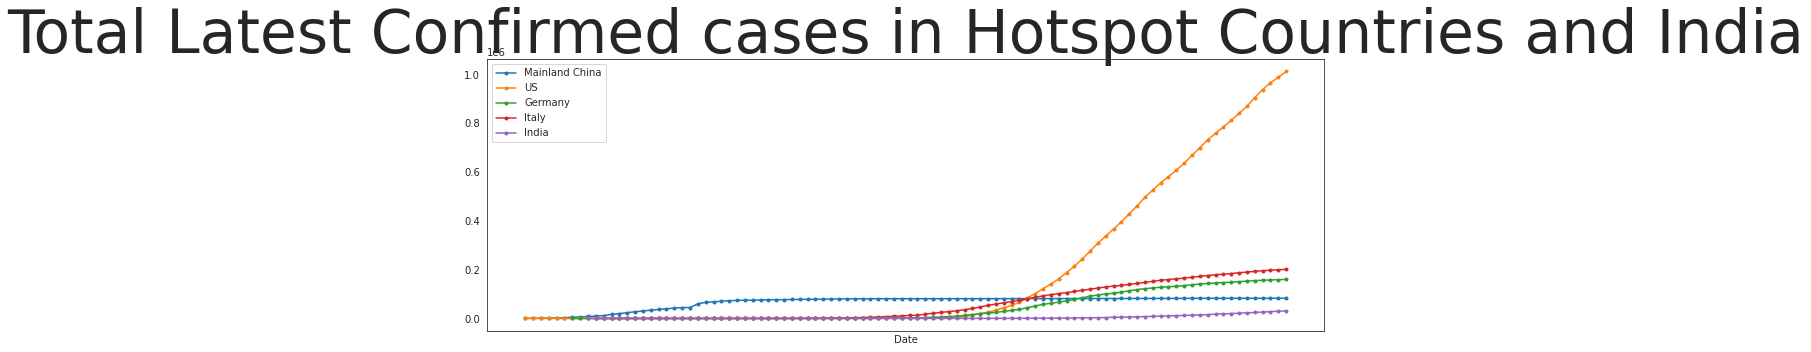

In [23]:
x = world_covid.groupby(['Country', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()
x = x.T
countrys = ['Mainland China', 'US', 'Germany', 'Italy','India']
plt.figure(figsize = (15,5))
for i in range(5):
    country = countrys[i]
    z = x[country].T
    plt.plot(z.index, z['Confirmed'], marker = '.', label = country)
    plt.xticks([])
plt.legend(loc = 'upper left')
plt.xlabel('Date')
plt.title('Total Latest Confirmed cases in Hotspot Countries and India', fontsize = 60)

In [24]:
x = world_covid.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].max()
x['Active'] = x['Confirmed']-(x['Deaths'] + x['Recovered'])
x['Death Rate'] = np.around(x['Deaths']/ x['Confirmed'],2)
x['Recovery Rate'] = np.around(x['Recovered'] / x['Confirmed'],2)
x.sort_values('Confirmed',ascending = False).fillna(0)[:50].style.background_gradient(cmap='Blues')

,Confirmed,Deaths,Recovered,Active,Death Rate,Recovery Rate
Country,,,,,,
US,295106,22912,115936,156258,0.08,0.39
Spain,232128,23822,123903,84403,0.1,0.53
Italy,201505,27359,68941,105205,0.14,0.34
France,167605,23660,46886,97059,0.14,0.28
UK,161145,21678,352,139115,0.13,0
Germany,159912,6314,117400,36198,0.04,0.73
Turkey,114653,2992,38809,72852,0.03,0.34
Russia,93558,867,8456,84235,0.01,0.09
Iran,92584,5877,72439,14268,0.06,0.78


Text(0.5, 1.0, 'Total Confirmed cases')

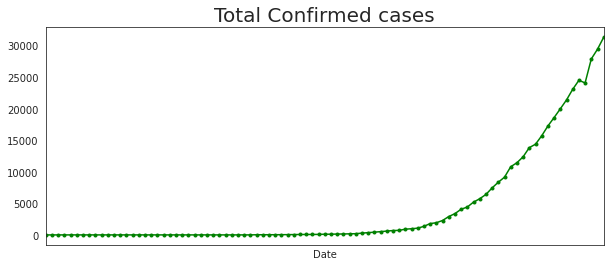

In [26]:

x = covid.groupby('Date')['Total Confirmed cases'].sum()
x.plot(xticks = [], marker = '.', figsize = (10,4), color = 'g')
plt.title('Total Confirmed cases', fontsize = 20)

Text(0.5, 1.0, 'Daily Confirmed Cases')

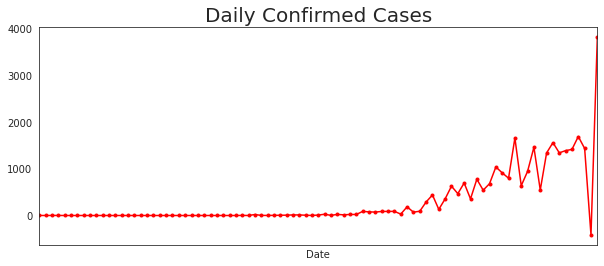

In [28]:
x = covid.groupby('Date')['Total Confirmed cases'].sum()
x = x[:-2]
s = 0
for i in range(len(x.values)):
    t = x.values[i].copy()
    x.values[i] -= s
    s = t
    
x.plot(xticks=[], marker = '.', figsize = (10,4),color = 'red',)
plt.title('Daily Confirmed Cases', fontsize = 20)

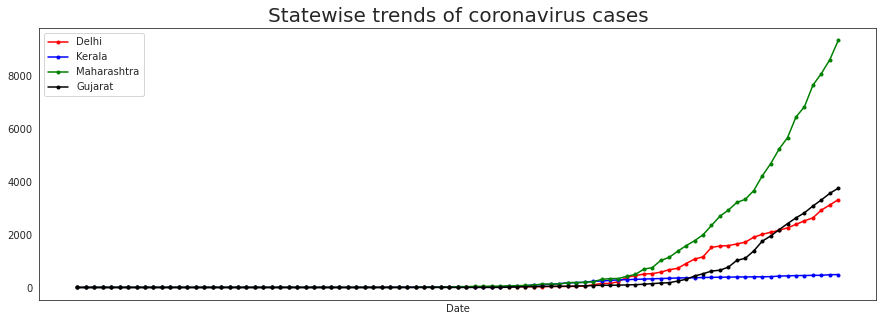

In [32]:
x = covid.pivot_table('Total Confirmed cases', index = 'Date', columns = 'Name of State / UT', fill_value = 0, aggfunc = 'sum')
plt.figure(figsize = (15,5))
plt.plot(x.index, x['Delhi'], color = 'r', marker = '.', label = 'Delhi')
plt.plot(x.index, x['Kerala'], color = 'b', marker = '.',label = 'Kerala')
plt.plot(x.index, x['Maharashtra'], color = 'g', marker = '.', label = 'Maharashtra')
plt.plot(x.index, x['Gujarat'], color = 'k', marker = '.', label = 'Gujarat')
plt.xticks([])
plt.xlabel('Date')
plt.title('Statewise trends of coronavirus cases', fontsize = 20)
plt.legend()

Text(0.5, 1.0, 'States with maximum number of cases')

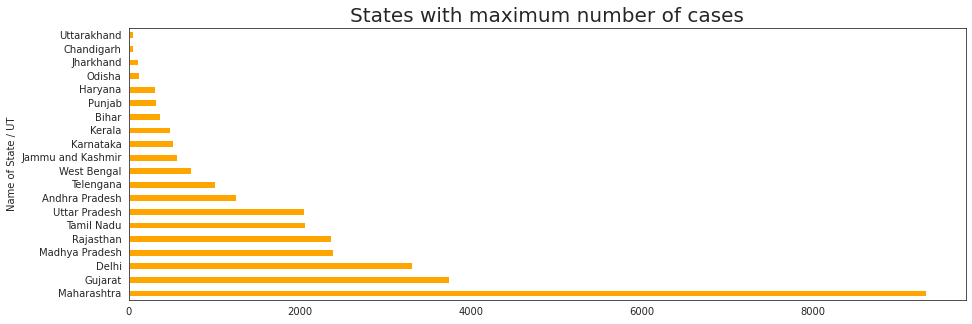

In [34]:
x = covid.pivot_table('Total Confirmed cases', columns = 'Date', index = 'Name of State / UT', fill_value = 0, aggfunc = 'sum')
x[x.columns[-1]].sort_values(ascending = False)[:20].plot(kind = 'barh', figsize = (15,5), color = 'orange')
plt.title('States with maximum number of cases', fontsize = 20)

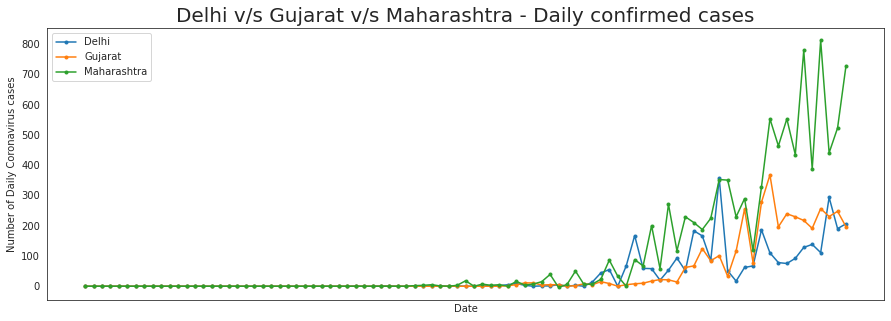

In [36]:
x = covid.pivot_table('Total Confirmed cases', index = 'Date', columns = 'Name of State / UT', fill_value = 0, aggfunc = 'sum')
prev = np.zeros(len(x.values[0]), dtype = 'int64')
for i in range(len(x.values)):
    t = x.values[i].copy()
    x.values[i] -= prev
    prev = t
plt.figure(figsize=(15,5))
plt.plot(x.index, x['Delhi'], marker = '.',label = 'Delhi')
plt.plot(x.index, x['Gujarat'], marker = '.', label = 'Gujarat')
plt.plot(x.index, x['Maharashtra'], marker = '.', label = 'Maharashtra')
plt.ylabel('Number of Daily Coronavirus cases')
plt.xlabel('Date')
plt.title('Delhi v/s Gujarat v/s Maharashtra - Daily confirmed cases', fontsize = 20)
plt.xticks([])
plt.legend()

Index(['2020-04-26', '2020-04-27', '2020-04-28'], dtype='object', name='Date')


Text(0.5, 1.0, 'Statewise confirmed cases in last 3 days')

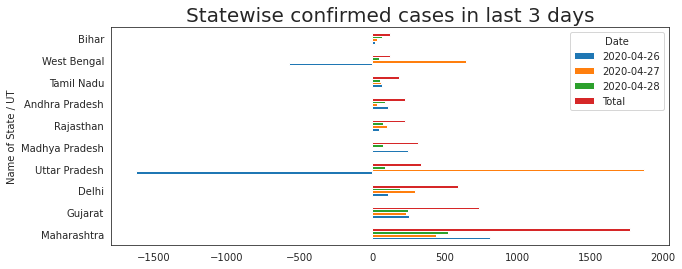

In [37]:
x = covid.pivot_table('Total Confirmed cases', index = 'Date', columns = 'Name of State / UT', fill_value = 0, aggfunc = 'sum')
prev = np.zeros(len(x.values[0]), dtype = 'int64')
for i in range(len(x.values)):
    t = x.values[i].copy()
    x.values[i] -= prev
    prev = t

x  = x[-4:-1].T
print(x.columns)
x['Total'] = 0
for columns in x.columns:
    x['Total'] += x[columns]
x['Total'] //= 2
x.sort_values('Total', ascending = False)[:10].plot(kind = 'barh', figsize = (10,4))
plt.title('Statewise confirmed cases in last 3 days', fontsize = 20)

Text(0.5, 1.0, 'Daily Deaths Casess')

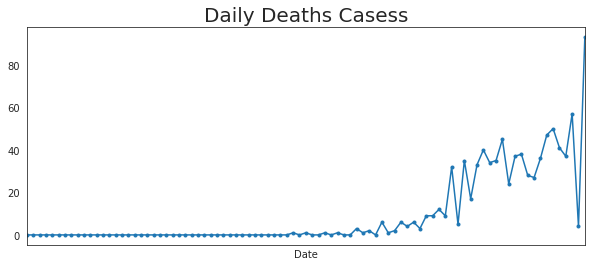

In [41]:
x = covid.groupby('Date')['Death'].sum()
x = x[:-2]
s = 0
for i in range(len(x.values)):
    t = x.values[i].copy()
    x.values[i] -= s
    s = t
    
x.plot(marker = '.',xticks=[], figsize = (10,4))
plt.title('Daily Deaths Casess', fontsize = 20)

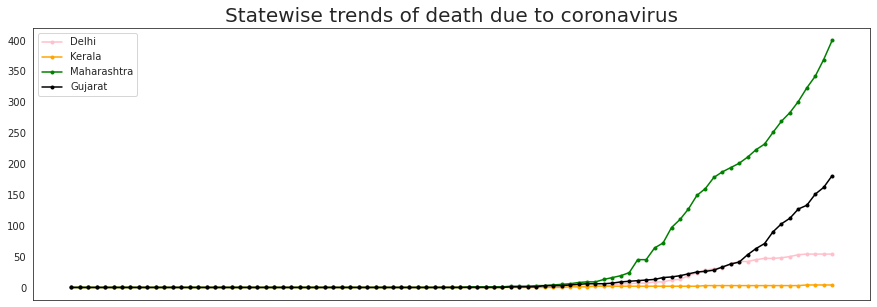

In [45]:
x = covid.pivot_table('Death', index = 'Date', columns = 'Name of State / UT', fill_value = 0, aggfunc = 'sum')
plt.figure(figsize=(15,5))
plt.plot(x.index, x['Delhi'], color = 'pink', marker = '.',label = 'Delhi')
plt.plot(x.index, x['Kerala'], color = 'orange', label = 'Kerala', marker = '.')
plt.plot(x.index, x['Maharashtra'], color = 'g', label = 'Maharashtra', marker = '.')
plt.plot(x.index, x['Gujarat'], color = 'k', label = 'Gujarat', marker = '.')
plt.xticks([])
plt.title('Statewise trends of death due to coronavirus', fontsize = 20)
plt.legend()

Text(0.5, 1.0, 'Death distribution over various states')

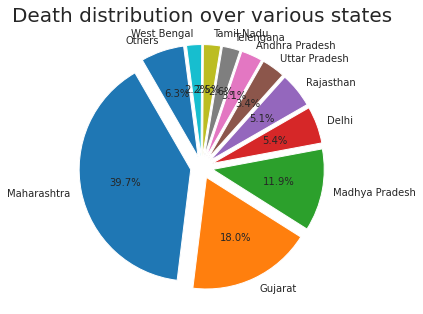

In [69]:
x = covid.pivot_table('Death', columns = 'Date', index = 'Name of State / UT', fill_value = 0, aggfunc = 'sum')
x = x[x.columns[-1]].sort_values(ascending = False)
z = x[10:].sum()
x = x[:10]
x.name = ''
x['Others'] = z
explode = []
for i in range(len(x.index)):
    explode.append(0.1)
explode = tuple(explode)
x.plot(kind = 'pie', figsize = (5,10), autopct='%1.1f%%', startangle=120, explode = explode)
plt.title('Death distribution over various states', fontsize = 20)

Text(0.5, 1.0, 'Cured/Discharged/Migrated')

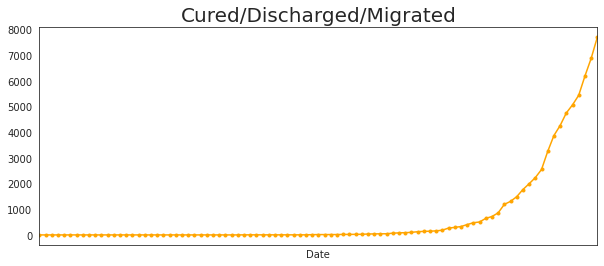

In [53]:
x = covid.groupby('Date')['Cured/Discharged/Migrated'].sum()
x.plot(xticks = [], marker='.', color = 'orange', figsize = (10,4))
plt.title('Cured/Discharged/Migrated', fontsize = 20)

Text(0.5, 1.0, 'Daily Recoveries')

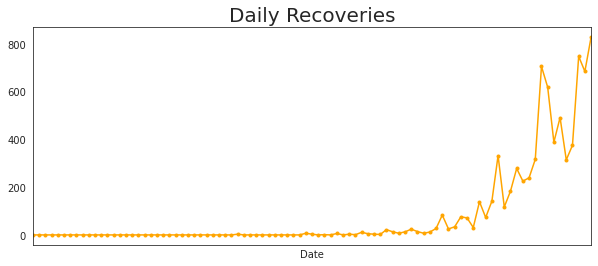

In [54]:
x = covid.groupby('Date')['Cured/Discharged/Migrated'].sum()
s = 0
for i in range(len(x.values)):
    t = x.values[i].copy()
    x.values[i] -= s
    s = t
plt.figure(figsize=(10,4))   
x.plot(xticks=[], marker = '.', color = 'orange')
plt.title('Daily Recoveries', fontsize = 20)

Text(0.5, 1.0, 'Testing Labs  State')

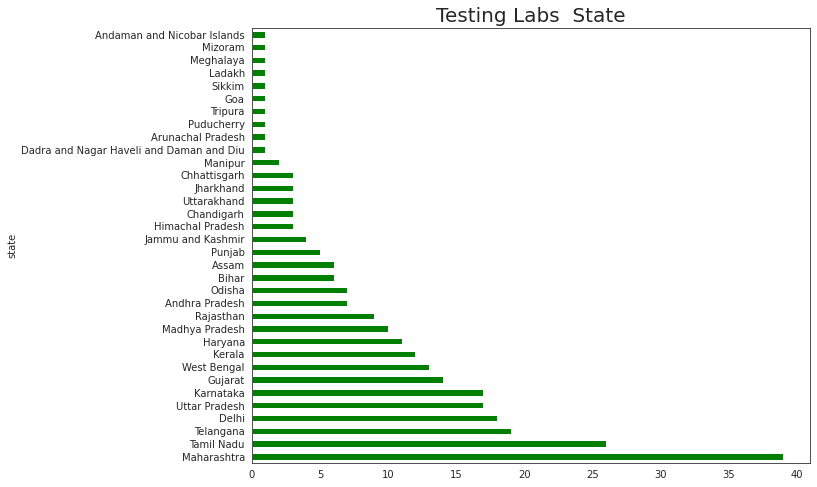

In [60]:
x = labs_covid.groupby('state')['lab'].count()
x = x.sort_values(ascending = False)
x.plot(kind = 'barh', figsize = (10,8), color = 'green')
plt.title('Testing Labs  State', fontsize = 20)

# ***Thanks for viewing this*
# -Regards
#  Kongkon**